<a href="https://colab.research.google.com/github/npace828/Titanic_Pclass_LogReg/blob/main/titanic_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Column names: Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
Train Accuracy: 0.6798307475317349
Test Accuracy: 0.6685393258426966

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       111
           1       0.59      0.40      0.48        67

    accuracy                           0.67       178
   macro avg       0.64      0.62      0.62       178
weighted avg       0.66      0.67      0.65       178



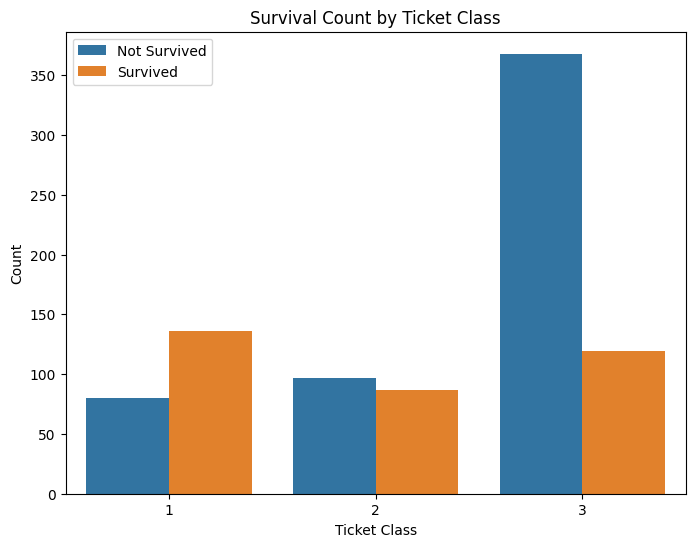

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Load the Titanic dataset

from google.colab import files
uploaded = files.upload()
titanic_data = pd.read_csv("titanic.csv")


# Print column names to verify
print("Column names:", titanic_data.columns)

# Preprocessing
# Drop irrelevant columns and handle missing values
titanic_data.drop(columns=["Name", "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"], inplace=True)


# Split data into features and target variable
X = titanic_data.drop(columns=["Survived"])
y = titanic_data["Survived"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Visualize survival rate based on Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival Count by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


